# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
Un scatterplot est un diagramme de points utilisé pour déterminer des liens et correspondances entre des valeurs.
Un barplot est un diagramme bâtons utilisé pour comparer différentes catégories par rapport à une valeure numérique.
Un boxplot est un diagramme sous forme de boîtes répartissant différentes propriétés d'un ensemble de données. 
Un violinplot est un boxplot qui prend en compte la probabilité de densité
Un histogramme est ...
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
Comprehensive report of organisms that have 
               one or many genome sequencing projects that 
               may be complete, in progress or planned
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name  Organism name at the species level according 
Kingdom        Taxonomic division: Archaea, Bacteria, Eukaryota, or Viruses 
Group                  Commonly used organism groups 
                       Eukaryota: Animals, Fungi, Plants, Protists;                           
                       Prokaryota: group corresponds to phylum; 
                       Viruses: groups defined as the first level (not ranked)                        
                       below the kingdom of Viruses

SubGroup       NCBI Taxonomy level below group:
                       Eukaryota: Mammals, Birds, Fishes, Flatworms, Insects, Amphibians
                       Reptiles, Roundworms, Ascomycetes, Basidiomycetes, 
                       Land Plants, Green Algae, Apicomplexans, Kinetoplasts; 
                       Prokaryota: sub-groups correspond to class level; 
                       Viruses: sub-groups correspond to families including floating genera 

Size (Mb)      Estimated genome size 
Chrs           Number of chromosomes 
Organelles     Number of the organelles 
Plasmids       Number of plasmids 
BioProjects    Number of genome sequencing projects 
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [9]:
f = open("overview.txt","r")
lines=f.readlines()
print(len(lines)-1)
f.close()

87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Il s'agit de l'espèce à laquelle l'élément appartient selon la classification des vivants (taxonomie)
```

Q6. Combien de royaumes sont présents dans la base ?

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [26]:
f = open("overview.txt","r")
lines=f.readlines()
a=0
b=0
e=0
v=0
for line in lines:
    if line.count("Archaea"):
        a+=1
    elif line.count("Bacteria"):
        b+=1
    elif line.count("Eukaryota"):
        e+=1
    elif line.count("Viruses"):
        v+=1
print("Archaea :",a,", Bacteria :",b,", Eukaryota :",e,", Viruses :",v)
f.close()

Archaea : 2265 , Bacteria : 37492 , Eukaryota : 15560 , Viruses : 32571


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Ce sont des ensembles d'organismes
```

Q9. Combien de groupes sont présents par royaume ?

In [38]:
f = open("overview.txt","r")
lines=f.readlines()
a=[]
b=[]
e=[]
v=[]

for line in lines:
    royaume = line.split("\t")[1] 
    group = line.split("\t")[2]
    if royaume == "Archaea":
        if group not in a:
            a.append(group)
    elif royaume == "Bacteria":
        if group not in b:
            b.append(group)
    elif royaume == "Eukaryota":
        if group not in e:
            e.append(group)
    elif royaume == "Viruses":
        if group not in v:
            v.append(group)
            
print("Archaea :",len(a),", Bacteria :",len(b),", Eukaryota :",len(e),", Viruses :",len(v))
f.close()

Archaea : 11 , Bacteria : 37 , Eukaryota : 5 , Viruses : 8


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [51]:
f = open("overview.txt","r")
lines=f.readlines()
a={}
b={}
e={}
v={}

for line in lines:
    
    royaume = line.split("\t")[1] 
    group = line.split("\t")[2]
    
    if royaume == "Archaea":
        if group not in a:
            a.update({group:1})
        else:
            a[group]+=1
            
    elif royaume == "Bacteria":
        if group not in b:
            b.update({group:1})
        else:
            b[group]+=1
            
    elif royaume == "Eukaryota":
        if group not in e:
            e.update({group:1})
        else:
            e[group]+=1
            
    elif royaume == "Viruses":
        if group not in v:
            v.update({group:1})
        else:
            v[group]+=1
            
print("Archaea :", a, "\n")
print("Bacteria :", b, "\n")
print("Eukaryota :", e, "\n")
print("Viruses :", v, "\n")
f.close()

Archaea : {'TACK group': 408, 'Candidatus Thermoplasmatota': 432, 'Euryarchaeota': 1035, 'Other': 1, 'unclassified Archaea': 57, 'Asgard group': 61, 'DPANN group': 249, 'Candidatus Hadarchaeota': 8, 'Candidatus Hydrothermarchaeota': 6, 'Halobacteriota': 1, 'environmental samples': 5} 

Bacteria : {'Terrabacteria group': 13337, 'unclassified Bacteria': 346, 'FCB group': 5037, 'Pseudomonadota': 11098, 'Acidobacteriota': 256, 'Synergistota': 85, 'Bacteria incertae sedis': 3872, 'PVC group': 1091, 'Myxococcota': 146, 'Campylobacterota': 256, 'Thermodesulfobacteriota': 568, 'Spirochaetota': 344, 'Aquificota': 42, 'Thermotogota': 72, 'Atribacterota': 43, 'Other': 2, 'Bdellovibrionota': 122, 'delta/epsilon subdivisions': 288, 'Caldisericota/Cryosericota group': 21, 'Deferribacterota': 27, 'Calditrichota': 10, 'Candidatus Lernaellota': 2, 'Elusimicrobiota': 118, 'Fusobacteriota': 79, 'Candidatus Deferrimicrobiota': 2, 'Nitrospinota/Tectimicrobiota group': 39, 'Candidatus Hinthialibacterota': 2

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

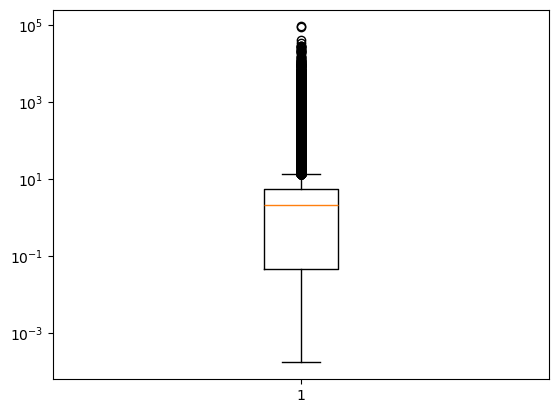

In [66]:
import matplotlib.pyplot as plt
f = open("overview.txt","r")
lines=f.readlines()[1:]
sizes=[]
for line in lines:
    if line.split("\t")[4] != "-":
        sizes.append(float(line.split("\t")[4]))
plt.yscale("log")
plt.boxplot(sizes)

f.close()

Q12. Affichez la distribution par royaume.

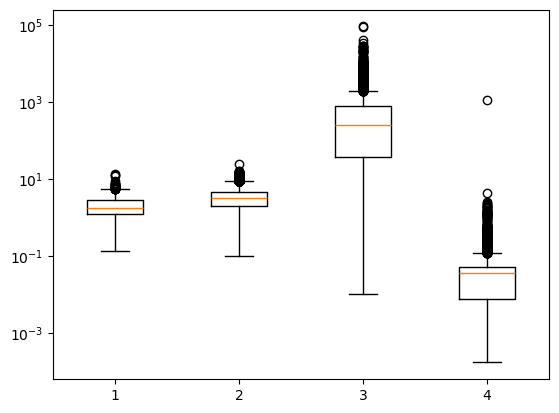

In [72]:
import matplotlib.pyplot as plt
f = open("overview.txt","r")
lines=f.readlines()[1:]
a=[]
b=[]
e=[]
v=[]
for line in lines:
    if line.split("\t")[4] != "-":
        if line.split("\t")[1] == "Archaea":
            a.append(float(line.split("\t")[4]))
        elif line.split("\t")[1] == "Bacteria":
            b.append(float(line.split("\t")[4]))
        elif line.split("\t")[1] == "Eukaryota":
            e.append(float(line.split("\t")[4]))
        elif line.split("\t")[1] == "Viruses":
            v.append(float(line.split("\t")[4]))
plt.yscale("log")
plt.boxplot([a,b,e,v])

f.close()

Q13. Affichez la distribution par groupe pour chaque royaume.

In [ ]:
#Votre code ici

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [ ]:
#Votre code ici

Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [ ]:
#Votre code ici

## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

In [ ]:
#Votre code ici

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

In [ ]:
#Votre code ici

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Votre réponse ici
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

In [ ]:
#Votre code ici

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

In [ ]:
#Votre code ici

Q21. Qu’observez-vous ?

```markdown
Votre réponse ici
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Votre réponse ici
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q24. Qu'observez-vous ?

```markdown
Votre réponse ici
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Votre réponse ici
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q27. Combien d'organismes ont 0 projets ?

In [ ]:
#Votre code ici

Q28. Combien d'organismes ont > 1 projets ?

In [ ]:
#Votre code ici

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [ ]:
#Votre code ici

Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [ ]:
#Votre code ici

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [ ]:
#Votre code ici

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [ ]:
#Votre code ici

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [ ]:
#Votre code ici

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici